# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("bank-additional-full.csv", sep = ";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [6]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [7]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

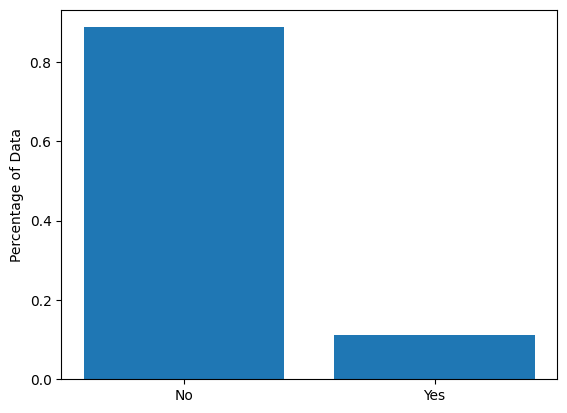

In [8]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [10]:
from imblearn.over_sampling import SMOTE

###TRANSFORM###
# Oversample the minority class using SMOTE
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler().fit(X_train_balanced)

X_scaled = scaler.transform(X_train_balanced)
X_test = scaler.transform(X_test)
y_train = y_train_balanced

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [11]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.374\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.675\ngini = 0.38\nsamples = 24201\nvalue = [18034.0, 6167.0]\nclass = No'),
 Text(0.125, 0.375, 'duration <= -0.692\ngini = 0.456\nsamples = 17133\nvalue = [11100.0, 6033.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.291\nsamples = 7811\nvalue = [6429, 1382]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 9322\nvalue = [4671, 4651]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 4.276\ngini = 0.037\nsamples = 7068\nvalue = [6934, 134]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.031\nsamples = 6991\nvalue = [6881, 110]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.429\nsamples = 77\nvalue = [53, 24]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.675\ngini = 0.403\nsamples = 26959\nvalue = [7546, 19413]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 1.246\ngini = 0.318\nsamples = 22763\nvalue = [4520, 18243]\nc

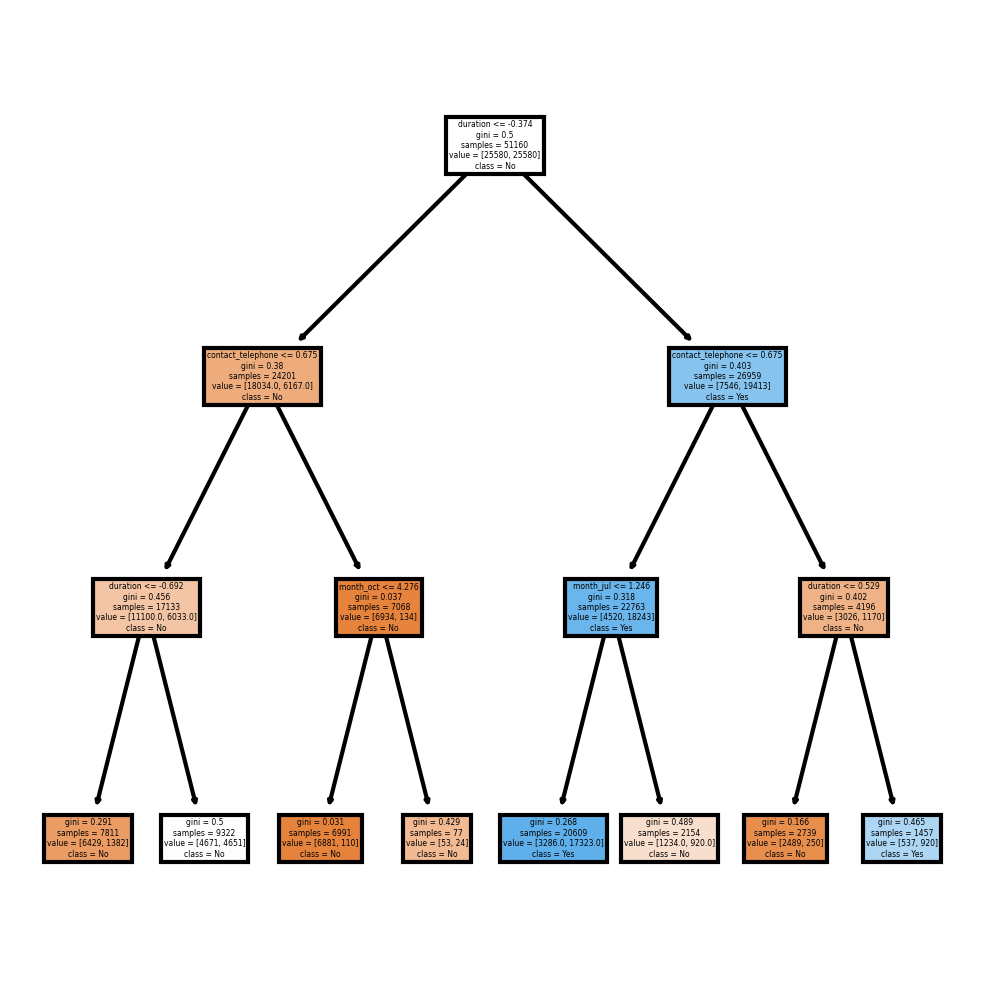

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

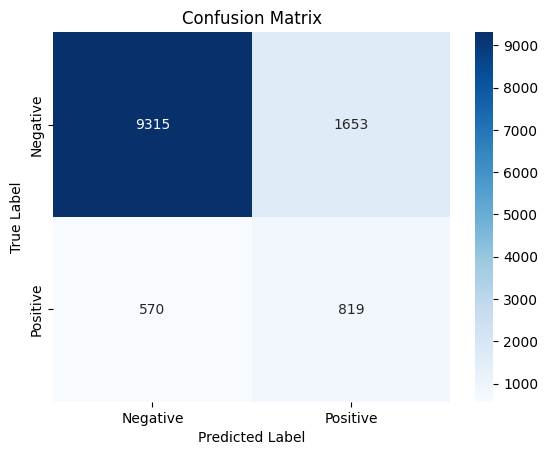

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [16]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [17]:
bagging = BaggingClassifier(estimator = dtree,
                 n_estimators = 100,
                 max_samples = .5,
                 max_features = 1.)

In [18]:
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

/Users/alisalou/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


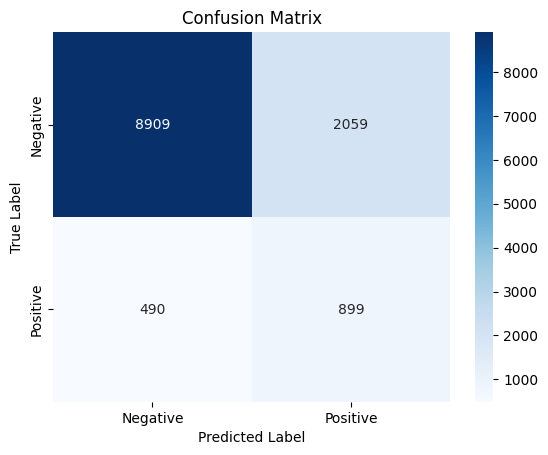

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [22]:
boost = AdaBoostClassifier(estimator = dtree,
                 n_estimators = 100,
                           learning_rate = .1)

In [23]:
boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

/Users/alisalou/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alisalou/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


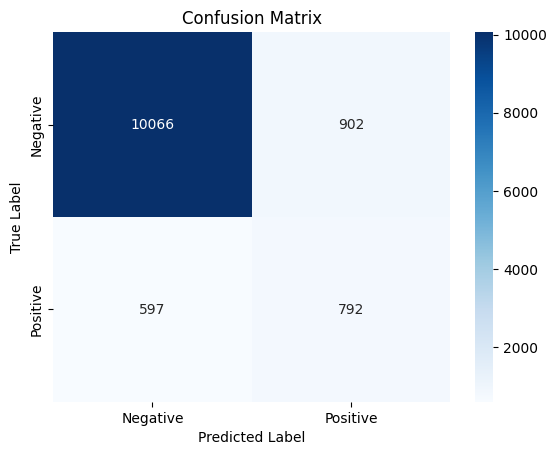

In [24]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Train a Logistic Regreesion) with 3 base learner models(DT, bagged tree, boosted tree). Interpret your coefficients and save your CM.

In [25]:
pip install mlens

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
base_predictions = [list(dtree_main.predict(X_scaled)),
list(boost.predict(X_scaled)),
list(bagging.predict(X_scaled))]

In [28]:
base_predictions = np.array(base_predictions).transpose()

In [29]:
base_predictions

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [30]:
super_learner = LogisticRegression()

In [31]:
super_learner.fit(base_predictions, y_train)

/Users/alisalou/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
super_learner.coef_

array([[0.44301114, 4.63124106, 0.69460012]])

The result shows that the boost model has the highest coefficient with best prediction performance.